<a href="https://colab.research.google.com/github/antonypaulson/Image_recognition_basics/blob/master/learning_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

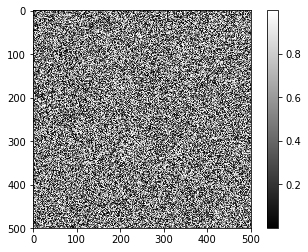

In [9]:
#Drawing a random image with numpy
import numpy as np
import matplotlib.pyplot as plt

random_image = np.random.random([500,500])
plt.imshow(random_image, cmap = 'gray')
plt.colorbar();

In [13]:
#Exploring 
from skimage import data
coins = data.coins()

print(f"type: {type(coins)}, datatype: {coins.dtype}, shape: {coins.shape}") 

type: <class 'numpy.ndarray'>, datatype: uint8, shape: (303, 384)


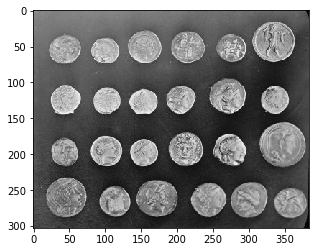

In [15]:
#Showing a black and white image of coins
plt.imshow(coins, cmap = 'gray')

Shape: (300, 451, 3)
Values min/max 0 231


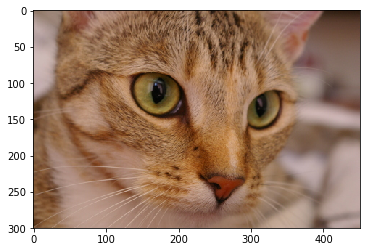

In [18]:
#Checking out a color image
cat = data.chelsea()

print(f'Shape: {cat.shape}')
print("Values min/max", cat.min(), cat.max())
plt.imshow(cat)

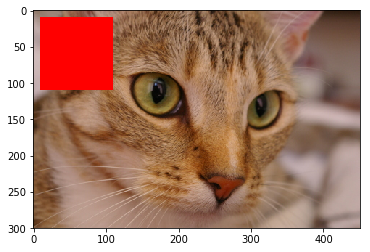

In [26]:
#There are three layers to images
#Broadly Red , Blue and Green

#Changing the above image and making it bright red

cat[10:110, 10:110, :] = [255, 0, 0] #{red, green, blue }
plt.imshow(cat)

In [0]:
#Revising matplotlib and plotting pictures through it

from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

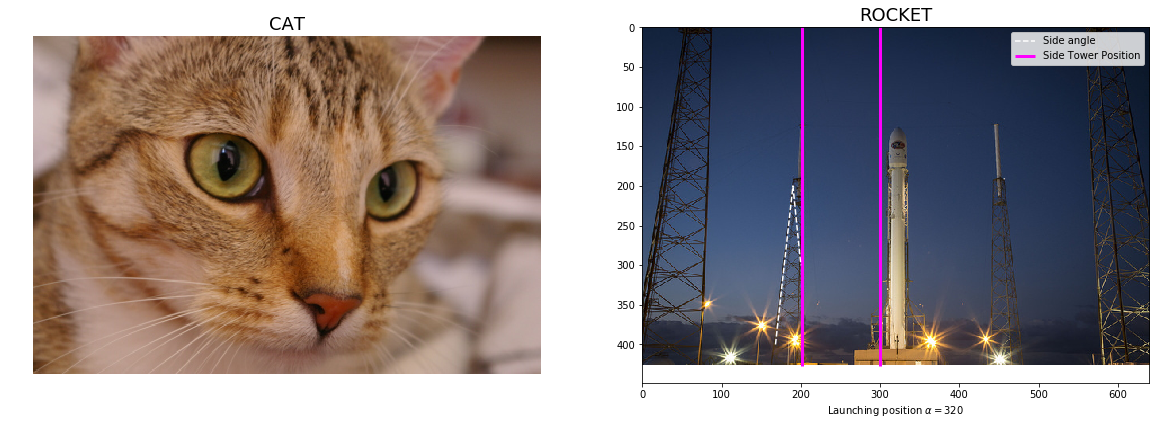

In [40]:
#Starting matplotlib coding

f, (ax0, ax1) = plt.subplots(1,2, figsize = (20,10))

ax0.imshow(img0)
ax0.set_title("CAT", fontsize = 18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title("ROCKET", fontsize = 18)
ax1.set_xlabel(r'Launching position $\alpha = 320$');

ax1.vlines([202,300], 0, img1.shape[0], 
           colors = 'magenta',
          linewidth = 3,
          label = 'Side Tower Position')
ax1.plot([168,190,200], [400, 200, 300], 
         color = 'white',
        linestyle = '--',
        label = 'Side angle')
ax1.legend();

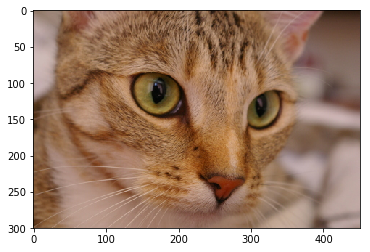

In [42]:
#Necesscary steps with skimage
from skimage import img_as_float
image = data.chelsea()

image_float = img_as_float(image)
plt.imshow(image_float)

In [55]:
#Working with custom image
from skimage import io
img = io.imread('ex1.png')
#img = img_as_float(img)
print (f'type: {image.dtype},\n shape: {image.shape}, \n MIN: {img.min()} , MAX : {img.max()}')

type: uint8,
 shape: (300, 451, 3), 
 MIN: 6 , MAX : 255


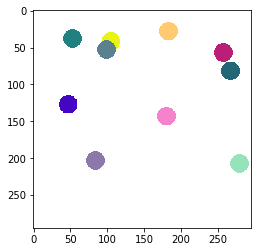

In [61]:
plt.imshow(img, cmap = 'gray');

In [66]:
#Collecting all images that you have

ic = io.ImageCollection('*.png')
ic.files

['ex0.png', 'ex1.png', 'ex2.png']

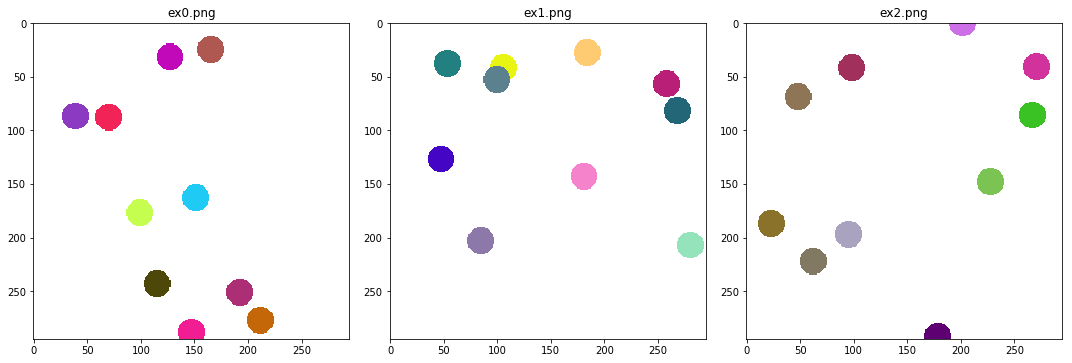

In [77]:
#plotting a collection of images
import os

f, axes = plt.subplots(nrows =1, ncols = 3, figsize = (15,6))

axes = axes.ravel()

  
for i, image in enumerate(ic):
  axes[i].imshow(image, cmap ='gray')
  axes[i].set_title(os.path.basename(ic.files[i]))
  
plt.tight_layout()

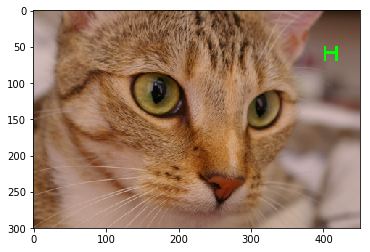

In [148]:
#Draw an H on the image

def draw_H(image, coords, color =(0,255,0)):
  out = image.copy()
  
  H_win = out[coords[0]:coords[0]+ 24,
               coords[1]:coords[1]+20,
               :]
  H_win[:20, :3] = color
  H_win[7:10, 3:18] = color
  H_win[:20, 15:20] = color
  return out


cat = data.chelsea()
cat_H = draw_H(cat, (50,-50))

plt.imshow(cat_H)

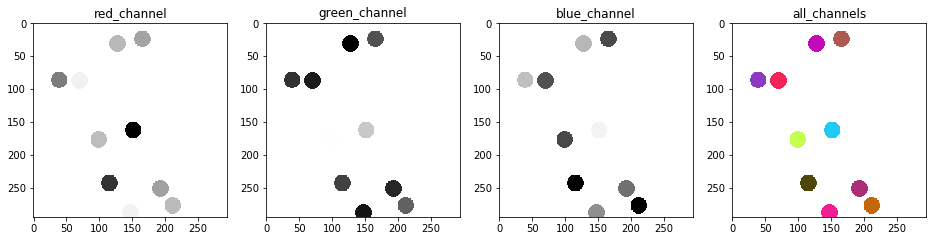

In [138]:
#Checking the rgb channels
image = io.imread('ex0.png')

#Assigning red, green and blue to different variables
r = image[:, :, 0]
g = image[:,:,1]
b = image[:,:,2]

r = image[..., 0]
g = image[..., 1]
b = image[..., 2]

f, axes = plt.subplots(1,4, figsize = (16,5))

(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r, cmap = 'gray')
ax_r.set_title('red_channel')

ax_g.imshow(g, cmap = 'gray')
ax_g.set_title('green_channel')

ax_b.imshow(b, cmap = 'gray')
ax_b.set_title('blue_channel')

#Stacking R,G,B layers again

ax_color.imshow(np.stack([r,g,b], axis = 2))
ax_color.set_title('all_channels');



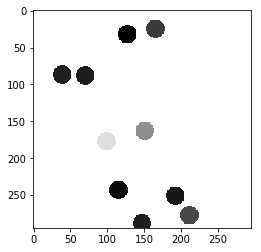

In [147]:
#Converting to greyscale
from skimage import color, img_as_float
image = img_as_float(io.imread('ex0.png'))
gray_image = color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray');